# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
train_og = pd.read_csv('train.csv')
test_og = pd.read_csv('test.csv')
holidays_events_og = pd.read_csv('holidays_events.csv')
stores_og = pd.read_csv('stores.csv')
transactions_og = pd.read_csv('transactions.csv')
oil_og = pd.read_csv('oil.csv')

train_og['date'] = pd.to_datetime(train_og['date'])
test_og['date'] = pd.to_datetime(test_og['date'])
oil_og['date'] = pd.to_datetime(oil_og['date'])
holidays_events_og['date'] = pd.to_datetime(holidays_events_og['date'])
transactions_og['date'] = pd.to_datetime(transactions_og['date'])

# Exploratory Data Analysis

### Train Dataset

In [3]:
train_og

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test_og

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
pd.to_datetime(train_og['date'])

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns]

In [6]:
train_og['family'].value_counts()

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONI

In [7]:
train_og['store_nbr'].value_counts()

store_nbr
1     55572
10    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
32    55572
33    55572
34    55572
35    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
46    55572
47    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
9     55572
Name: count, dtype: int64

In [8]:
train_og.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [9]:
train_og.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [10]:
train_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [11]:
duplicates = train_og[train_og.duplicated(keep=False)]
duplicates

,id,date,store_nbr,family,sales,onpromotion


In [12]:
train_og

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### Test Dataset

In [13]:
train_og['store_nbr'].value_counts().index.sort_values(ascending=True)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
      dtype='int64', name='store_nbr')

In [14]:
test_og['store_nbr'].value_counts().index.sort_values(ascending=True)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
      dtype='int64', name='store_nbr')

In [15]:
test_og

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


###  Holidays events dataset

In [16]:
holidays_events_og

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


### Stores Dataset

In [17]:
stores_og

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


###  Transactions Dataset

In [18]:
transactions_og['date'].value_counts().index.sort_values(ascending=True)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1682, freq=None)

### Oil dataset

In [19]:
oil_og

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


# First conclusion : 
### transactions DF can't be used because the date do not go with the test dataset dates, so training on these features will be useless and missleading.
### we need to merge all dataframe data feature to the train and test datasets and then do the 4C's afterwards (Correcting , Completing , Creating , Converting) based on the commun feature between all of the dataset beside transactions

In [20]:
train_og

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [21]:
test_og

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [22]:

if holidays_events_og.columns[1] == 'type':
    holidays_events_og = holidays_events_og.rename(columns={'type' : 'holidays_type'})

In [23]:
holidays_events_og.isnull().sum()


date             0
holidays_type    0
locale           0
locale_name      0
description      0
transferred      0
dtype: int64

In [24]:
def complete_merge_holidays_df(df ,holidays_df ):
    # Create 'IsHoliday' column with 0 (False) for df and test_og
    df['IsHoliday'] = False
    # Merge df with holidays_df
    merged_df = pd.merge(df, holidays_df, on='date', how='left')

    # Update 'IsHoliday' to 1 (True) where there's a match and fill NaN values
    merged_df['IsHoliday'] = np.where(merged_df['holidays_type'].notna(), True, merged_df['IsHoliday'])
    for col in holidays_df.columns.drop('date'):
        merged_df[col] = merged_df[col].fillna('None')
    merged_df['transferred'] = merged_df['transferred'].replace('None', False)
    
    return merged_df

In [25]:
train_merged = complete_merge_holidays_df(train_og , holidays_events_og)
test_merged = complete_merge_holidays_df(test_og , holidays_events_og)
train_merged

D:\Users\retbu\AppData\Local\Temp\ipykernel_23144\71177736.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['transferred'] = merged_df['transferred'].replace('None', False)
D:\Users\retbu\AppData\Local\Temp\ipykernel_23144\71177736.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['transferred'] = merged_df['transferred'].replace('None', False)


,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [26]:
test_merged

,id,date,store_nbr,family,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,False,None,None,None,None,False
1,3000889,2017-08-16,1,BABY CARE,0,False,None,None,None,None,False
2,3000890,2017-08-16,1,BEAUTY,2,False,None,None,None,None,False
3,3000891,2017-08-16,1,BEVERAGES,20,False,None,None,None,None,False
4,3000892,2017-08-16,1,BOOKS,0,False,None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,False,None,None,None,None,False
28508,3029396,2017-08-31,9,PREPARED FOODS,0,False,None,None,None,None,False
28509,3029397,2017-08-31,9,PRODUCE,1,False,None,None,None,None,False
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,False,None,None,None,None,False


In [27]:
# Focus on store_nbr == 4
store_4_data = train_merged[train_merged['store_nbr'] == 1]

# Filter for rows where IsHoliday is True for store_nbr == 4
holidays_store_4 = store_4_data[store_4_data['IsHoliday'] == True]

# Check if the values in the specified columns are the same
if not holidays_store_4.empty:
    # Get the first row's values for comparison
    first_holiday_values = holidays_store_4[['locale', 'locale_name', 'description']].iloc[0]

    # Compare all other rows with the first row
    consistent = (holidays_store_4[['locale', 'locale_name', 'description']] == first_holiday_values).all()

    print(f"For store_nbr == 4 when IsHoliday is True:")

    print(f"  'locale' is consistent: {consistent['locale']}")
    print(f"  'locale_name' is consistent: {consistent['locale_name']}")
    print(f"  'description' is consistent: {consistent['description']}")

    print("\nUnique values for inconsistent features:")

    if not consistent['locale']:
        unique_locale = holidays_store_4['locale'].unique()
        print(f"  ¤¤¤'locale': {unique_locale}")

    if not consistent['locale_name']:
        unique_locale_name = holidays_store_4['locale_name'].unique()
        print(f"  ¤¤¤'locale_name': {unique_locale_name}")

    if not consistent['description']:
        unique_description = holidays_store_4['description'].unique()
        print(f"  ¤¤¤'description': {unique_description}")

else:
    print("For store_nbr == 4, there are no instances where IsHoliday is True in the dataset.")

For store_nbr == 4 when IsHoliday is True:
  'locale' is consistent: False
  'locale_name' is consistent: False
  'description' is consistent: False

Unique values for inconsistent features:
  ¤¤¤'locale': ['National' 'Local' 'Regional']
  ¤¤¤'locale_name': ['Ecuador' 'Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo'
 'Guaranda' 'Imbabura' 'Machala' 'Latacunga' 'El Carmen' 'Santo Domingo'
 'Cayambe' 'Guayaquil' 'Esmeraldas' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas']
  ¤¤¤'description': ['Primer dia del ano' 'Recupero puente Navidad'
 'Recupero puente primer dia del ano' 'Carnaval' 'Fundacion de Manta'
 'Provincializacion de Cotopaxi' 'Fundacion de Cuenca'
 'Cantonizacion de Libertad' 'Cantonizacion de Riobamba' 'Viernes Santo'
 'Dia del Trabajo' 'Dia de la Madre-1' 'Cantonizacion del Puyo'
 'Dia de la Madre' 'Batalla de Pichincha' 'Cantonizacion de Guaranda'
 'Provincializacion de Imbabura' 'Fundacion de Machala'
 'Canto

# Merge stores_og data and treat the NaN values of oil.csv and merge it to both train and test data
### And then we'll do the 4 C's on that big data

In [28]:
if train_merged.columns[-1] != 'cluster':
  train_merged = pd.merge(train_merged , stores_og, on='store_nbr' , how="left")
  test_merged = pd.merge(test_merged , stores_og, on='store_nbr' , how="left")

In [29]:
train_merged

,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [30]:
holidays_events_og

,date,holidays_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [31]:
testing = pd.merge(holidays_events_og, oil_og, on='date' , how='inner')
testing

,date,holidays_type,locale,locale_name,description,transferred,dcoilwtico
0,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,2013-02-11,Holiday,National,Ecuador,Carnaval,False,97.01
2,2013-02-12,Holiday,National,Ecuador,Carnaval,False,97.48
3,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,97.10
4,2013-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,91.23
...,...,...,...,...,...,...,...
197,2017-07-25,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,47.77
198,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True,48.54
199,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,48.81
200,2017-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [32]:
import pandas as pd
import numpy as np

# Assuming oil_og is your DataFrame and it has a column named 'dcoilwtico'

def fill_nan_custom(series):
    """
    Fills NaN values in a Pandas Series with a custom logic.

    Args:
        series: The Pandas Series to fill NaN values in.

    Returns:
        The Series with NaN values filled according to the logic.
    """
    nan_indices = series.isna().index[series.isna()]

    for i in nan_indices:
        if i == series.index[0]:
            series.loc[i] = 93.10
            series.loc[1174] = 46.40
            series.loc[1175] = 45.40
        else:
            prev_index = series.index[series.index.get_loc(i) - 1]
            next_index = series.index[series.index.get_loc(i) + 1]
            series.loc[i] = (series.loc[prev_index] + series.loc[next_index]) / 2
    return series

# Apply the function to your 'dcoilwtico' column
oil_og['dcoilwtico'] = fill_nan_custom(oil_og['dcoilwtico'].copy())
oil_og.fillna
# Alternatively, you can do it in place if you prefer:
# fill_nan_custom(oil_og['dcoilwtico'])

<bound method NDFrame.fillna of            date  dcoilwtico
0    2013-01-01       93.10
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]>

In [33]:
oil_og

,date,dcoilwtico
0,2013-01-01,93.10
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<Axes: xlabel='date', ylabel='dcoilwtico'>

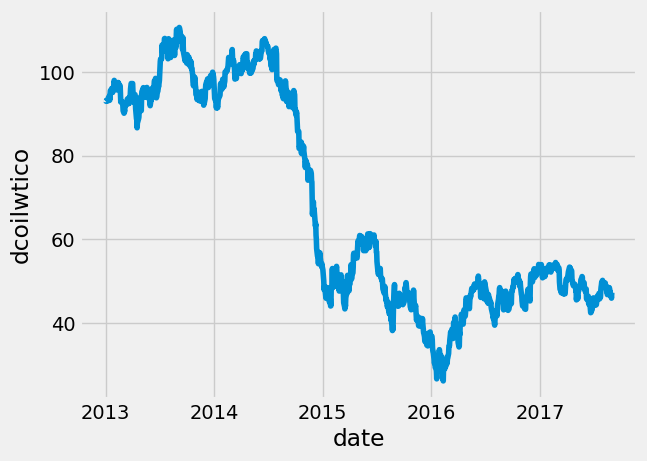

In [34]:

sns.lineplot(x='date', y='dcoilwtico', data=oil_og)

In [35]:
if train_merged.columns[-1] != 'dcoilwtico':
  train_merged = pd.merge(train_merged , oil_og, on='date' , how='left')
  test_merged = pd.merge(test_merged , oil_og, on='date' , how='left')

In [36]:
oil_og

,date,dcoilwtico
0,2013-01-01,93.10
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [37]:
train_merged.fillna(0, inplace=True)
test_merged.fillna(0 , inplace=True)

In [38]:
transactions_og

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [39]:
test_merged

,id,date,store_nbr,family,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
1,3000889,2017-08-16,1,BABY CARE,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
2,3000890,2017-08-16,1,BEAUTY,2,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
4,3000892,2017-08-16,1,BOOKS,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26


In [40]:
train_merged[(train_merged['date'] == '2013-01-01') & (train_merged['family'] == 'AUTOMOTIVE')]

,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.1
33,33,2013-01-01,10,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,C,15,93.1
66,66,2013-01-01,11,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,93.1
99,99,2013-01-01,12,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Latacunga,Cotopaxi,C,15,93.1
132,132,2013-01-01,13,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Latacunga,Cotopaxi,C,15,93.1
165,165,2013-01-01,14,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Riobamba,Chimborazo,C,7,93.1
198,198,2013-01-01,15,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Ibarra,Imbabura,C,15,93.1
231,231,2013-01-01,16,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Santo Domingo,Santo Domingo de los Tsachilas,C,3,93.1
264,264,2013-01-01,17,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,C,12,93.1
297,297,2013-01-01,18,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,B,16,93.1


# for each date, there is all each family values for each store_nbr value, proof below

In [41]:
print(f"""All store_nbr unique total values : {train_merged['store_nbr'].value_counts().size}\n
All family unique total values : {train_merged['family'].value_counts().size}\n
All sotre_nbr x family unique total values : {train_merged['store_nbr'].value_counts().size * train_merged['family'].value_counts().size}""")

All store_nbr unique total values : 54

All family unique total values : 33

All sotre_nbr x family unique total values : 1782


In [42]:
print(f"""All store_nbr unique total values : {test_merged['store_nbr'].value_counts().size}\n
All family unique total values : {test_merged['family'].value_counts().size}\n
All sotre_nbr x family unique total values : {test_merged['store_nbr'].value_counts().size * test_merged['family'].value_counts().size}""")

All store_nbr unique total values : 54

All family unique total values : 33

All sotre_nbr x family unique total values : 1782


In [43]:
train_merged['state'].value_counts().size

16

In [44]:
train_merged[train_merged['family'] == 'AUTOMOTIVE']

,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
33,33,2013-01-01,10,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,C,15,93.10
66,66,2013-01-01,11,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Cayambe,Pichincha,B,6,93.10
99,99,2013-01-01,12,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Latacunga,Cotopaxi,C,15,93.10
132,132,2013-01-01,13,AUTOMOTIVE,0.0,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Latacunga,Cotopaxi,C,15,93.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054183,3000723,2017-08-15,54,AUTOMOTIVE,8.0,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,El Carmen,Manabi,C,3,47.57
3054216,3000756,2017-08-15,6,AUTOMOTIVE,7.0,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,D,13,47.57
3054249,3000789,2017-08-15,7,AUTOMOTIVE,5.0,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,D,8,47.57
3054282,3000822,2017-08-15,8,AUTOMOTIVE,4.0,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,D,8,47.57


In [45]:
test_merged[(test_merged['store_nbr'] == 3) & (test_merged['date'] == '2017-08-16') ]

,id,date,store_nbr,family,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
726,3001614,2017-08-16,3,AUTOMOTIVE,0,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
727,3001615,2017-08-16,3,BABY CARE,0,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
728,3001616,2017-08-16,3,BEAUTY,2,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
729,3001617,2017-08-16,3,BEVERAGES,21,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
730,3001618,2017-08-16,3,BOOKS,0,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
731,3001619,2017-08-16,3,BREAD/BAKERY,12,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
732,3001620,2017-08-16,3,CELEBRATION,0,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
733,3001621,2017-08-16,3,CLEANING,22,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
734,3001622,2017-08-16,3,DAIRY,37,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8
735,3001623,2017-08-16,3,DELI,18,False,None,None,None,None,False,Quito,Pichincha,D,8,46.8


In [46]:
test_merged

,id,date,store_nbr,family,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
1,3000889,2017-08-16,1,BABY CARE,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
2,3000890,2017-08-16,1,BEAUTY,2,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
4,3000892,2017-08-16,1,BOOKS,0,False,None,None,None,None,False,Quito,Pichincha,D,13,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,False,None,None,None,None,False,Quito,Pichincha,B,6,47.26


In [74]:
test = train_merged[((train_merged['holidays_type'] == 'None') | (train_merged['holidays_type'] == 'Holiday')) & 
                    ((train_merged['locale'] == 'None') | (train_merged['locale'] == 'Local')) &
                    ((train_merged['description'] == 'None') | (train_merged['description'] == 'Fundacion de Ambato')) &
                    ((train_merged['locale_name'] == 'None') | (train_merged['locale_name'] == 'Ambato'))]

In [76]:
train_merged

,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
1,1,2013-01-01,1,BABY CARE,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
2,2,2013-01-01,1,BEAUTY,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
3,3,2013-01-01,1,BEVERAGES,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
4,4,2013-01-01,1,BOOKS,0.000,0,True,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,True,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,47.57


In [80]:
test[test['date']== '2013-01-05' ]

,id,date,store_nbr,family,sales,onpromotion,IsHoliday,holidays_type,locale,locale_name,description,transferred,city,state,type,cluster,dcoilwtico


In [70]:
train_merged['description'].value_counts()

description
None                               2551824
Carnaval                             17820
Fundacion de Cuenca                  10692
Primer dia del ano                    8910
Provincializacion de Cotopaxi         8910
                                    ...   
Terremoto Manabi+29                   1782
Traslado Fundacion de Guayaquil       1782
Puente Dia de Difuntos                1782
Recupero Puente Dia de Difuntos       1782
Traslado Primer dia del ano           1782
Name: count, Length: 102, dtype: int64

In [73]:
test_merged['locale_name'].value_counts()

locale_name
None      26730
Ambato     1782
Name: count, dtype: int64

In [54]:
holidays_events_og

,date,holidays_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [77]:
import pandas as pd

# Assuming your DataFrame is named test

# Identify categorical columns (you might need to adjust this based on your specific data)
# Common ways to identify categorical features:
# 1. Check the data type (object or category)
categorical_cols = test.select_dtypes(include=['object', 'category']).columns

# 2. If you have domain knowledge, you might have a predefined list of categorical features
# For example:
# categorical_cols = ['feature1', 'feature3', 'feature5']

# Iterate through the identified categorical columns and display the number of unique values
for col in categorical_cols:
    num_unique = test[col].nunique()
    print(f"{col} : {num_unique}")

family : 33
holidays_type : 2
locale : 2
locale_name : 2
description : 2
city : 22
state : 16
type : 5


In [48]:
import pandas as pd

# Assuming your DataFrame is named train_merged

# Identify categorical columns (you might need to adjust this based on your specific data)
# Common ways to identify categorical features:
# 1. Check the data type (object or category)
categorical_cols = test_merged.select_dtypes(include=['object', 'category']).columns

# 2. If you have domain knowledge, you might have a predefined list of categorical features
# For example:
# categorical_cols = ['feature1', 'feature3', 'feature5']

# Iterate through the identified categorical columns and display the number of unique values
for col in categorical_cols:
    num_unique = test_merged[col].nunique()
    print(f"{col} : {num_unique}")

family : 33
holidays_type : 2
locale : 2
locale_name : 2
description : 2
city : 22
state : 16
type : 5


In [47]:
transactions_og

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
